Project : House Price Prediction 

Author - Md. Muntasirul Hoque

Importing Needed Packages

In [62]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df=pd.read_csv(r"C:\Users\MuntasirulHoque\OneDrive - ADA Global\Desktop\ML CODE\House\House-Price-Prediction\archive\Housing.csv")

In [64]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [66]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

No Null values

In [67]:
df.duplicated().sum()

0

No duplicate Values

# Exploratory Data Analysis

Checking various price v/s attribute variations in viz

Boxplot : Price v/s bedroom

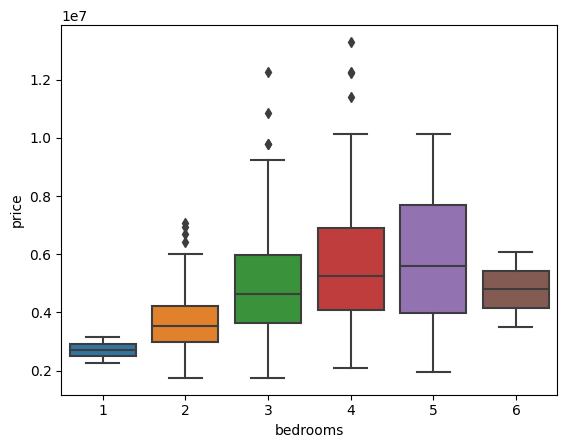

In [68]:
sns.boxplot(x=df['bedrooms'],y=df['price'])
plt.show()

Bedrooms with 4 houses may have other features that are usually the costliest to buy

 # Price v/s furnishing status

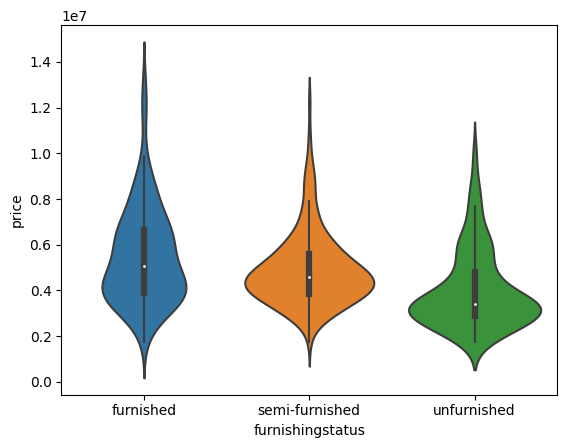

In [69]:
sns.violinplot(x=df['furnishingstatus'],y=df['price'])
plt.show()

Strip plot : Price v/s Parking

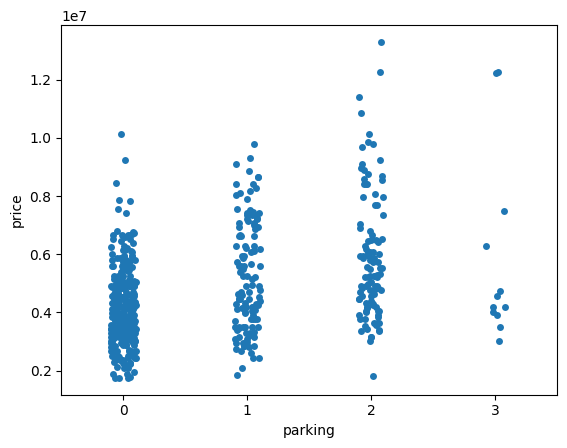

In [70]:
sns.stripplot(x=df['parking'],y=df['price'])
plt.show()

# Correlation
Strength and direction of linear relation between 2 attributes

In [71]:
corr=df.corr()
corr

C:\Users\MuntasirulHoque\AppData\Local\Temp\ipykernel_11372\3182140910.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


From the above table we observe that area, bathrooms, stories are most significant factors to affect the pricing value.

In [72]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

We need to label encode the object data types to train our model

In [73]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

cat_data=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']

for i in cat_data:

    df[i]=lb.fit_transform(df[i])

In [74]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


# Evaluation functions
I will create two function that will test my Training and Test scores and some Error Metrics respectively

In [75]:
def eval(model):

    print("The training score is : ", model.score(x_train,y_train),end="\n" )
    print("The test score is: ", model.score(x_test,y_test),end="\n")

In [76]:
def metric_score(y_pred,y_test):

    print("The mean absolute error is :", mean_absolute_error(y_pred,y_test) )

    print("The mean squared error is : ",mean_squared_error(y_pred,y_test))

    print("The R2 score is : ", r2_score(y_pred,y_test))

# Spliting the Data

In [77]:
x=df.drop('price',axis=1)
y=df.price

In [78]:
print(x.head())
print(y.head())
print(type(x))
print(type(y))

   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                0                1        2         1                 0  
1                0                1        3         0                 0  
2                0                0        2         1                 1  
3                0                1        3         1                 0  
4                0                1        2         0                 0  
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64
<class 'pandas.core.f

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, r2_score



In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

We split the data into training and test sets with 70:30 ratio

In [81]:
print(x_train.shape,"",type(x_train))
print(y_train.shape,"\t",type(y_train))
print(x_test.shape,"",type(x_test))
print(y_test.shape,"\t ",type(y_test))

(381, 12)  <class 'pandas.core.frame.DataFrame'>
(381,) 	 <class 'pandas.core.series.Series'>
(164, 12)  <class 'pandas.core.frame.DataFrame'>
(164,) 	  <class 'pandas.core.series.Series'>


# Model Validation
We will use 3 models to check who's accuracy is best

In [82]:
#Decission Tree
from sklearn.tree import DecisionTreeRegressor
DTRmodel = DecisionTreeRegressor(criterion='squared_error',splitter='best',max_depth = 10, min_samples_split=20,random_state=42)
DTRmodel.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=20, random_state=42)

In [83]:
eval(DTRmodel)

The training score is :  0.7359034045875587
The test score is:  0.4137533567860191


In [84]:
y_pred=DTRmodel.predict(x_test)

In [85]:
metric_score(y_pred,y_test)

The mean absolute error is : 907505.2489050085
The mean squared error is :  1471210626716.3113
The R2 score is :  0.35889060137566764


Conclusion: When number of min sample split were low it was observed to be a highly overfit model with very bad test scores. On increasing min sample split and max depth the training scored reduced with around 20% increase in test scores. Still not a very good model for predictions.

# Random Forest Regressor

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
RFRmodel = RandomForestRegressor(n_estimators=100,max_depth = 10, min_samples_split=10,random_state=42,criterion='squared_error')
RFRmodel.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, random_state=42)

In [88]:
eval(RFRmodel)

The training score is :  0.8294445816326053
The test score is:  0.6541797646271963


In [89]:
y_pred2=RFRmodel.predict(x_test)
metric_score(y_pred2,y_test)

The mean absolute error is : 719418.2400521481
The mean squared error is :  867850436506.9796
The R2 score is :  0.5034936387237565


Conclusion: We see a significant 20% improve in testing score compared to Decision Tree Regressor, lesser error variation and 15% R2 score improvement. Changing hyper parameters give about 5-7% change in scores.

# Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression
LRmodel=LinearRegression()
LRmodel.fit (x_train,y_train)
eval(LRmodel)

The training score is :  0.6722721620878298
The test score is:  0.6701127297811893


In [91]:
y_pred3=LRmodel.predict(x_test)
metric_score(y_pred3,y_test)

The mean absolute error is : 721569.6538611305
The mean squared error is :  827865989822.3114
The R2 score is :  0.5614064514555354


Conclusion: Linear Regression Model the best model so far, having 6-8% better score than Random Forest.

# Accuracy plot

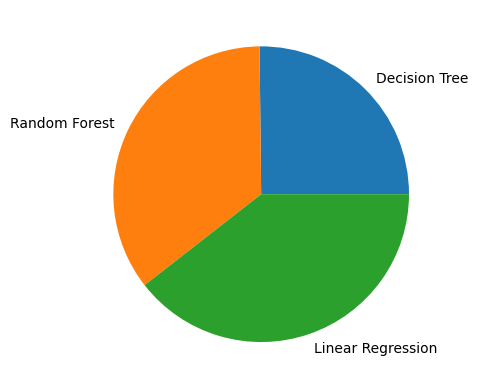

In [92]:
import matplotlib.pyplot as plt

models = ['Decision Tree','Random Forest','Linear Regression']
scores = [35.8,50.3,56.1]

plt.pie(scores,labels=models)
plt.show()